<a href="https://colab.research.google.com/github/Helsonfs/Estudos_data_science_cvirus/blob/main/Estudos_Data_Science_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
mortos = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055


In [4]:
confirmados.shape

(279, 542)

In [5]:
confirmados['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
274               Vietnam
275    West Bank and Gaza
276                 Yemen
277                Zambia
278              Zimbabwe
Name: Country/Region, Length: 279, dtype: object

In [6]:
last_date = '7/11/21'

confirmados[last_date]

0      131586
1      132592
2      146064
3       14075
4       39958
        ...  
274     30478
275    315160
276      6948
277    175729
278     67765
Name: 7/11/21, Length: 279, dtype: int64

In [7]:
confirmados['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
confirmados.sample(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21
120,French Polynesia,France,-17.679700,149.406800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18884,18889,18889,18889,18899,18902,18914,18922,18930,18930,18930,18939,18947,18952,18957,18963,18963,18963,18972,18981,18991,18992,18994,18994,18994,19003,19003,19007,19007,19011,19011,19011,19017,19020,19022,19026,19026,19026,19026,19034
204,NaN,Norway,60.472000,8.468900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,126218,126521,126689,126817,127066,127254,127466,127676,127874,127986,128046,128277,128499,128679,128898,129095,129225,129333,129545,129766,129944,130270,130342,130491,130588,130744,131037,131316,131509,131749,131861,131949,132136,132363,132574,132673,132966,133100,133197,133367
190,NaN,Mozambique,-18.665695,35.529562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,70965,71019,71082,71114,71145,71165,71239,71279,71355,71461,71538,71568,71651,71764,71929,72123,72367,72507,72577,72775,73211,73652,74186,74704,75138,75422,75828,76404,77205,78074,79213,80151,80888,82346,83116,84922,86249,87935,88868,90555
90,Yunnan,China,24.974000,101.487000,1,2,5,11,16,26,44,55,70,83,93,105,117,122,128,133,138,138,141,149,153,154,156,162,168,171,171,172,172,174,174,174,174,174,174,174,...,355,356,358,360,361,361,362,363,369,374,376,377,377,380,382,384,388,391,391,391,394,396,401,406,411,415,417,419,419,423,427,435,446,461,463,480,491,491,519,526
260,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,298,298,298,298,298,298,298,298,313,392,392,456,456,456,456,456,821,821,821,1147
219,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,75,78,83,83,83,83,83,83,83,155,155,155,209,244,279,304,330,341,350,377,396,425,425,428,429,439,443,446,457,476,490,492,492,515,517,519,520,525,530,538
197,NaN,Netherlands,52.132600,5.291300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1657017,1659399,1661520,1663050,1664427,1665846,1667560,1669121,1670498,1671703,1672744,1673596,1674628,1675644,1676708,1677596,1678282,1678983,1679542,1680228,1680880,1681580,1682221,1682773,1683271,1683828,1684366,1685000,1685825,1686766,1687891,1689106,1690625,1692834,1696480,1701911,1708837,1719120,1728438,1736879
97,NaN,Cote d'Ivoire,7.540000,-5.547100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,47389,47435,47476,47490,47493,47511,47547,47605,47638,47662,47662,47760,47909,47933,47973,47973,48031,48044,48047,48058,48058,48058,48058,48176,48192,48203,48242,48305,48378,48378,48513,48564,48580,48634,48693,48739,48776,48776,48776,48869
61,Fujian,China,26.078900,117.987400,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,625,628,629,629,631,632,632,635,636,637,637,638,638,641,646,650,651,652,659,660,661,661,665,669,672,675,677,680,685,686,688,688,689,690,692,692,692,692,696,698
129,Wallis and Futuna,France,-14.293800,-178.116500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,44

In [9]:
confirmados.set_index('Province/State').loc['Anhui']

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
7/8/21               1008
7/9/21               1008
7/10/21              1008
7/11/21              1008
7/12/21              1008
Name: Anhui, Length: 541, dtype: object

In [10]:
confirmados.set_index('Province/State').iloc[1]

Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
1/23/20                 0
                   ...   
7/8/21             132565
7/9/21             132580
7/10/21            132587
7/11/21            132592
7/12/21            132597
Name: nan, Length: 541, dtype: object

In [11]:
# valor palso pois é muito grande, não valos considerar essa análise pois há varios campos vazios (muita disparidade no padrão)

confirmados['Country/Region'].value_counts() 

China             34
Canada            16
France            12
United Kingdom    12
Australia          8
                  ..
Greece             1
Sweden             1
Azerbaijan         1
Taiwan*            1
Japan              1
Name: Country/Region, Length: 195, dtype: int64

In [12]:
confirmados_por_pais = confirmados.groupby('Country/Region').sum()
confirmados_por_pais.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055


In [13]:
confirmados_por_pais.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austria,47.516200,14.550100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,...,645834,646167,646438,646800,647079,647322,647688,647971,648187,648387,648620,648732,648849,649002,649181,649309,649445,649576,649670,649728,649845,649922,650016,650192,650261,650324,650353,650412,650474,650569,650662,650737,650817,650901,651008,651128,651291,651453,651612,651804
Greece,39.074200,21.824300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,...,406751,407857,408789,409368,410166,411534,412420,413170,413954,414636,414933,415401,416195,416741,417253,417706,418095,418342,418548,418943,419455,419909,420295,420670,420905,421266,421829,422456,423185,424165,425347,425964,426963,429144,430960,433021,435018,437345,438809,440872
Spain,40.463667,-3.749220,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,...,3693012,3697981,3697981,3697981,3707523,3711027,3715454,3729458,3733600,3733600,3733600,3741767,3745199,3749031,3753228,3757442,3757442,3757442,3764651,3768691,3773032,3777539,3782463,3782463,3782463,3792642,3799733,3808960,3821305,3833868,3833868,3833868,3866475,3880612,3897996,3915313,3937192,3937192,3937192,3971124
US,40.000000,-100.000000,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,17,17,...,33326529,33343379,33357285,33362680,33378176,33391189,33409836,33424381,33449080,33457308,33462085,33474815,33486120,33498545,33508938,33529529,33538049,33541941,33554275,33565215,33577651,33590481,33614196,33621499,33625419,33640502,33651852,33664970,33679433,33709325,33714064,33717761,33723289,33747513,33770444,33790505,33838746,33847784,33853948,33886713
Cuba,21.521757,-77.781167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,145567,146696,147831,148918,150103,151259,152420,153578,154866,156238,157708,159057,160594,161997,163415,164896,166368,167804,169365,170854,172909,174789,177253,179656,182354,184943,188023,190993,193945,197253,200728,204247,207322,210913,214577,218396,224818,231568,238491,244914
Panama,8.538000,-80.782100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,380207,381122,381949,382475,382851,383733,384512,385353,386269,387127,387842,388325,389173,390221,391190,392166,393144,393727,394241,395449,396526,397727,398820,399877,400666,401332,402581,403778,404983,406013,407330,408123,408728,410004,411226,412466,413626,414647,415480,416232
Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304,11794,12150,12508,12978,13258,13530,13782,13989,14323,14537,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665
Burma,21.916200,95.956000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,143945,144157,144253,144317,144456,144579,144715,144876,145064,145230,145603,145826,146051,146406,146768,147069,147615,148022,148617,149247,149927,150714,151573,152356,153160,154385,155697,157277,159347,161210,163087,165405,168374,171976,175923,180055,184375,188752,192213,197227
Ireland,53.142400,-7.692100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [14]:
confirmados_por_pais.loc['China'][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
7/8/21     103992.0
7/9/21     104019.0
7/10/21    104020.0
7/11/21    104072.0
7/12/21    104101.0
Name: China, Length: 538, dtype: float64

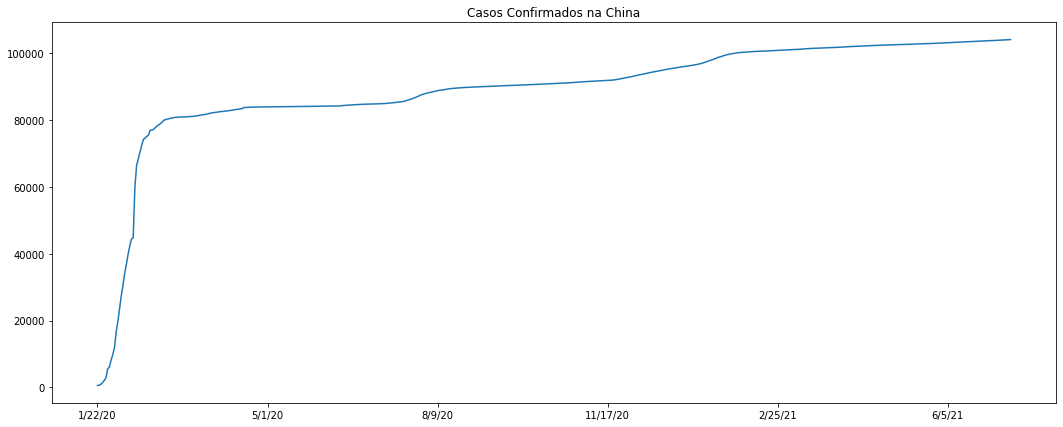

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,7))
confirmados_por_pais.loc['China'][2:].plot()
plt.title('Casos Confirmados na China')
plt.show()

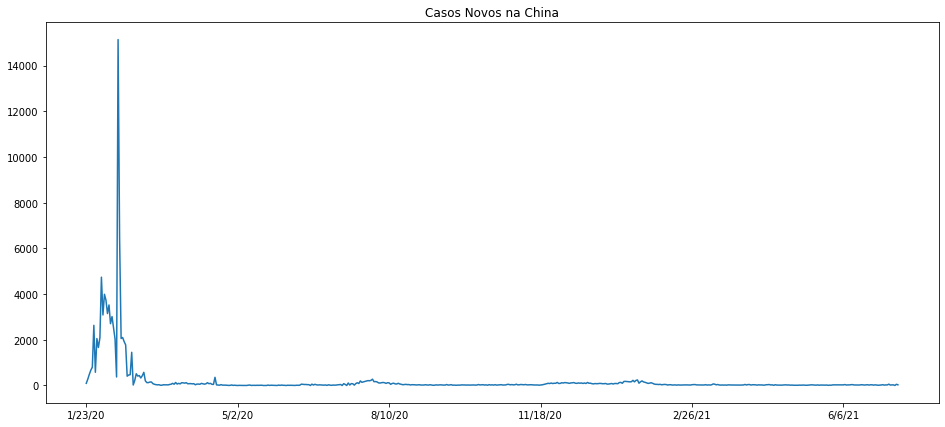

In [26]:
plt.figure(figsize=(16,7))
plt.title('Casos Novos na China')
novos_casos_china = confirmados_por_pais.loc['China'][2:].diff().dropna()
novos_casos_china.plot()

Text(0.5, 1.0, 'Confirmados por país')

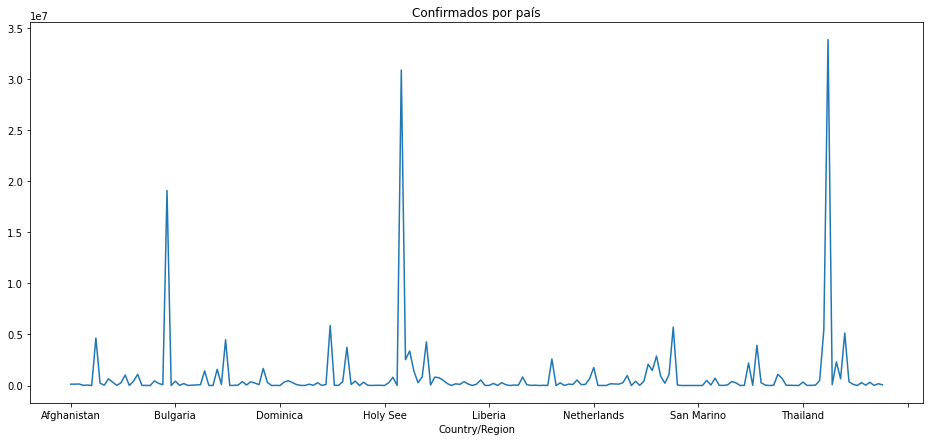

In [25]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].plot()
plt.title('Confirmados por país')

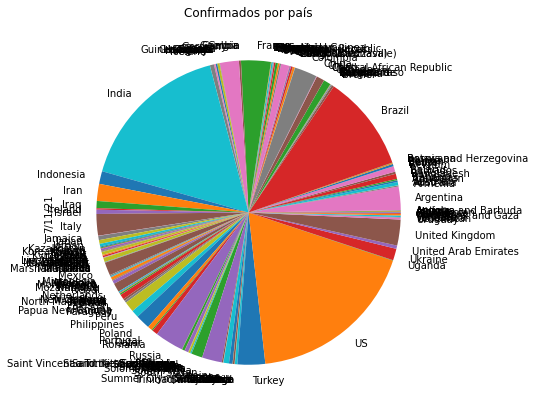

In [27]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].plot(kind = 'pie')
plt.title('Confirmados por país')
plt.show()

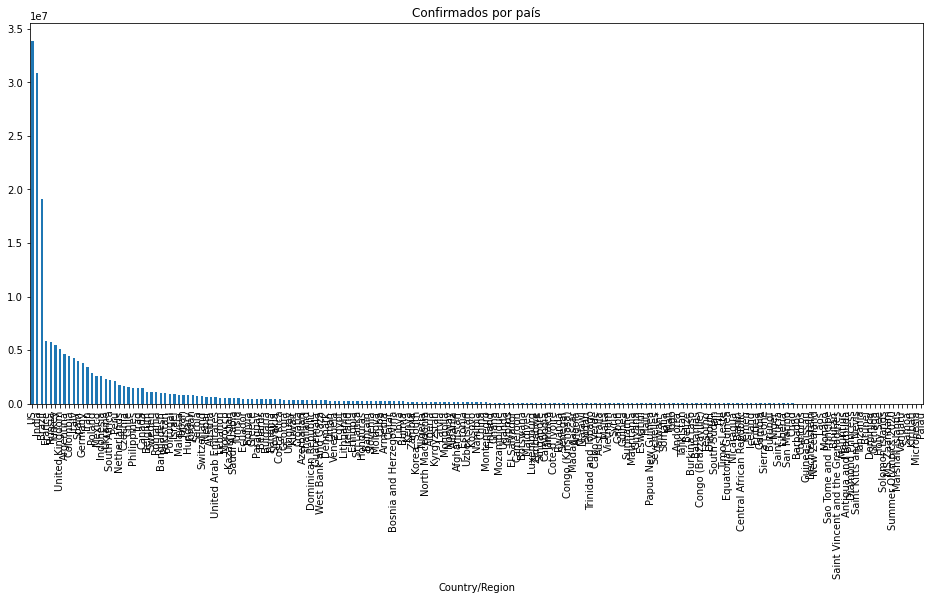

In [30]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Confirmados por país')
plt.show()

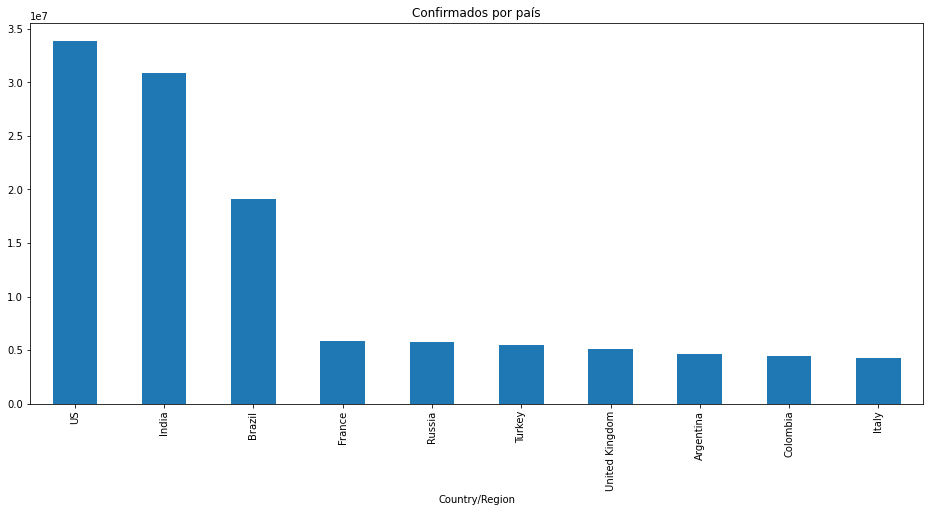

In [32]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].sort_values(ascending = False)[:10].plot(kind = 'bar')
plt.title('Confirmados por país')
plt.show()

In [34]:
display(mortos.head())
display(recuperados.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3034,3068,3104,3145,3187,3251,3305,3356,3412,3449,3527,3612,3683,3683,3842,3934,3934,3934,4215,4293,4366,4452,4519,4519,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561,5561,5791
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2451,2451,2451,2451,2452,2452,2452,2452,2453,2453,2453,2453,2454,2454,2454,2454,2454,2454,2454,2455,2455,2455,2455,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3497,3504,3510,3518,3527,3537,3544,3552,3560,3565,3571,3579,3588,3598,3605,3615,3624,3631,3641,3650,3660,3669,3678,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,784,788,794,797,800,803,811,815,819,825,831,836,842,847,851,853,856,859,868,875,878,881,883,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58070,58144,58265,58622,58998,59569,59871,60280,60598,60939,61410,61706,61820,62397,62698,63426,63875,64401,65071,65565,66102,66799,67183,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129566,129598,129627,129664,129702,129736,129761,129785,129807,129826,129842,129865,129879,129888,129895,129903,129910,129918,129918,129941,129955,129966,129975,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90517,90767,90995,91198,91413,91651,91894,92132,92384,92620,92852,93094,93355,93586,93831,94093,94336,94571,94822,95084,95331,95599,95878,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13527,13527,13527,13527,13557,13557,13569,13578,13591,13591,13591,13618,13626,13633,13640,13650,13650,13650,13665,13665,13688,13694,13697,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28646,28802,28866,28880,29329,29368,29553,29960,30101,30207,30282,30359,30775,31003,31105,31569,31589,31676,31782,32003,32322,32340,32605,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357


In [37]:
confirmados.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan    131586
Albania        132592
Algeria        146064
Andorra         14075
Angola          39958
Name: 7/11/21, dtype: int64

In [38]:
mortos.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan    5561
Albania        2456
Algeria        3836
Andorra         127
Angola          935
Name: 7/11/21, dtype: int64

In [39]:
recuperados.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan     81077
Albania        130050
Algeria        101430
Andorra         13770
Angola          34327
Name: 7/11/21, dtype: int64

In [ ]:
def latest_por_pais(data):
  return data.groupby('Country/Region').sum().iloc[:,-1].head()

latest_por_pais(confirmados).head()

In [45]:
informacoes = [latest_por_pais(confirmados)], [latest_por_pais(mortos)], [latest_por_pais(recuperados)]

In [48]:
pd.concat(informacoes)

TypeError: ignored